LOGISTIC REGRESSION 

1.import data
2.descriptive statistics
3.missing values anaalysis and treatment
4.outlier analysis and treatment
5.EDA
6.correlation

In [1]:
# importing data

import pandas as pd
data = pd.read_csv('Diabetes.csv')
print(data.head())
print(data.info())
print(data.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [3]:
#descriptive statistics

print(data.isnull().sum())
print(data.duplicated().sum())
data = data.drop_duplicates()
print(data.duplicated().sum())
print(data.corr())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0
0
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528   

In [4]:
#missing values analysis and treatment

print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


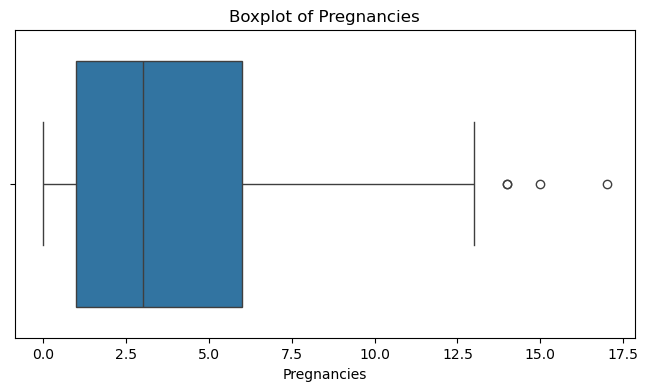

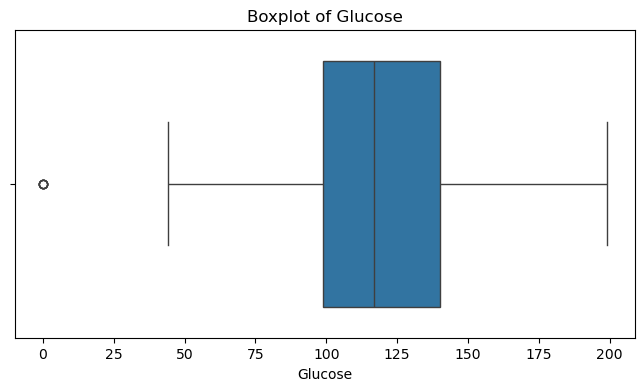

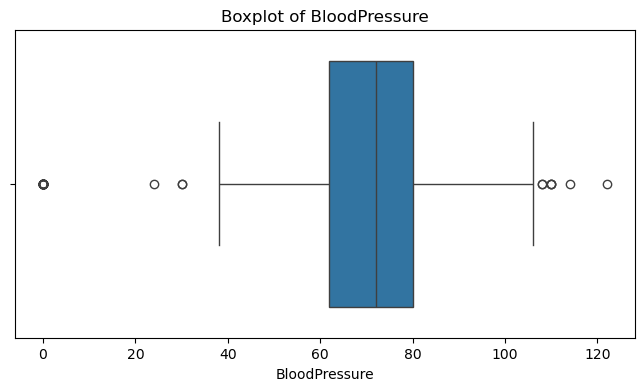

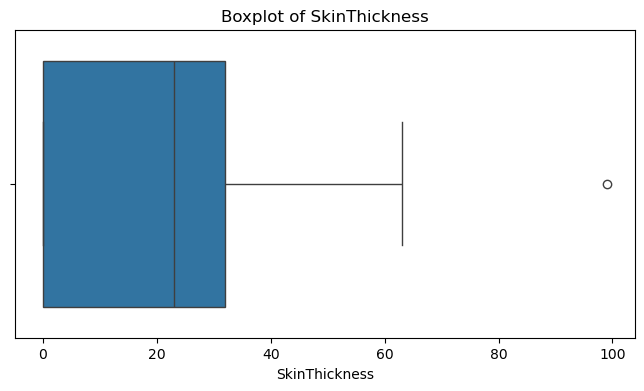

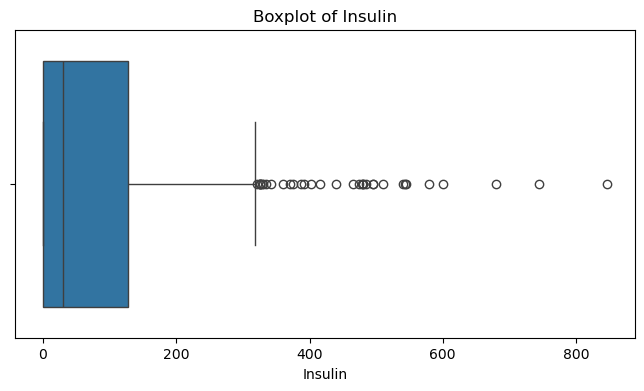

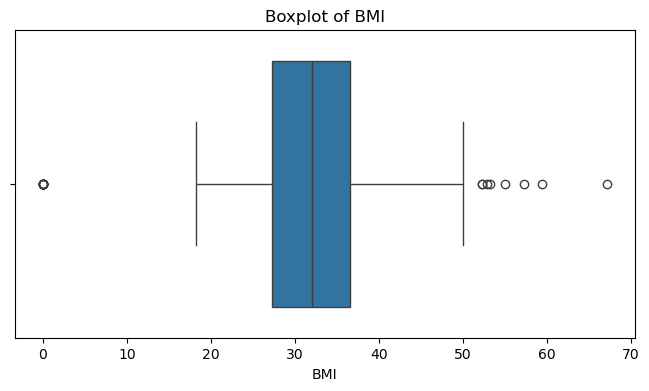

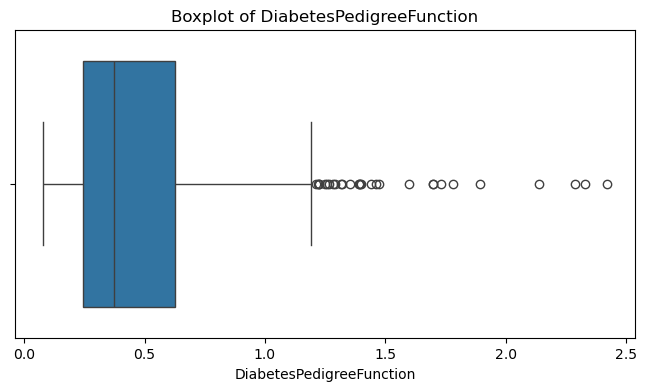

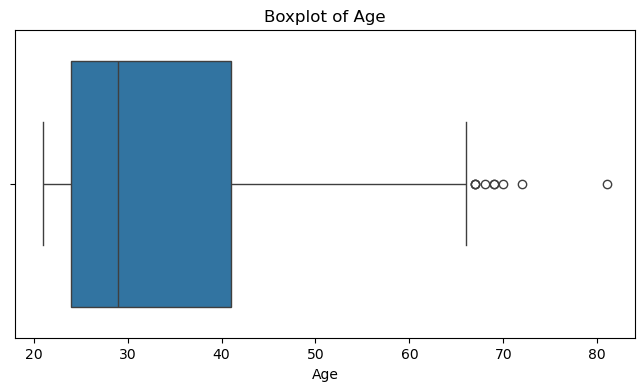

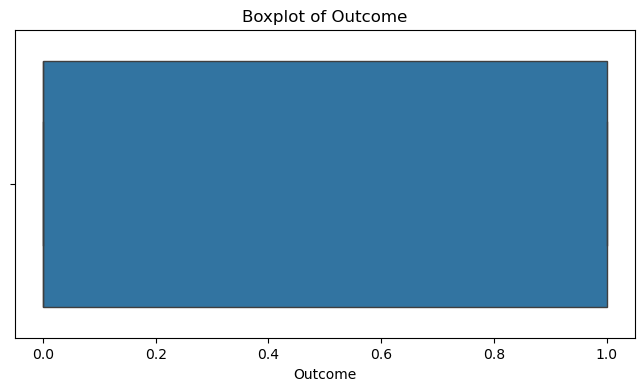

In [5]:
# outlier analysis and treatment

import matplotlib.pyplot as plt
import seaborn as sns
for column in data.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

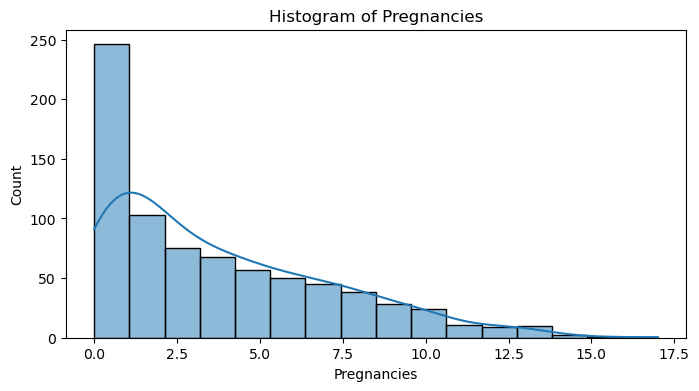

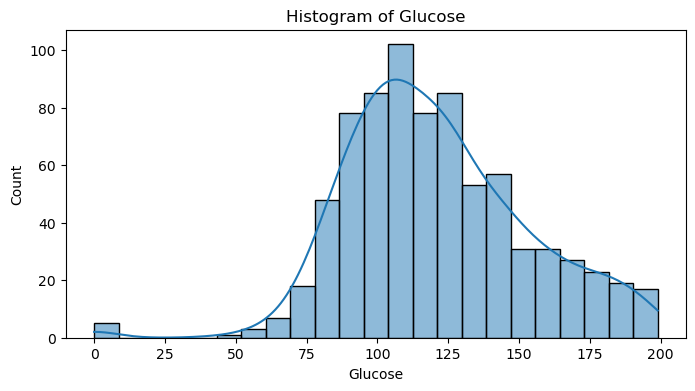

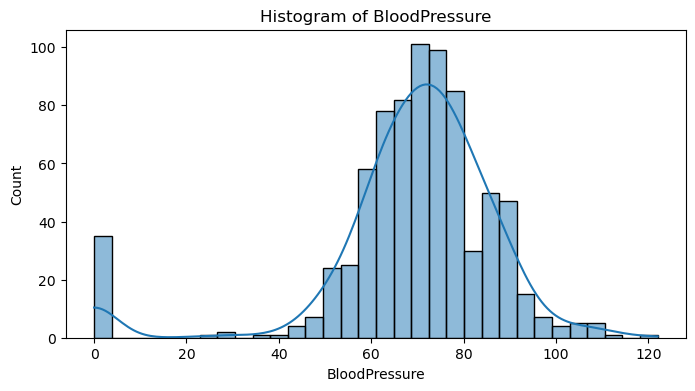

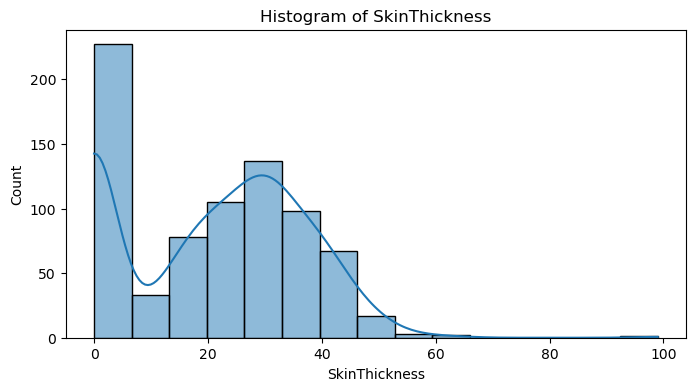

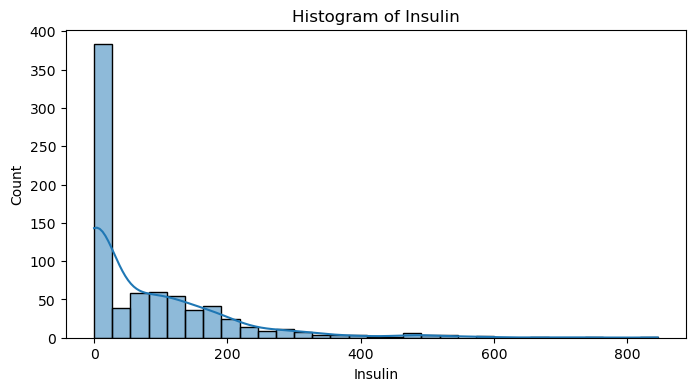

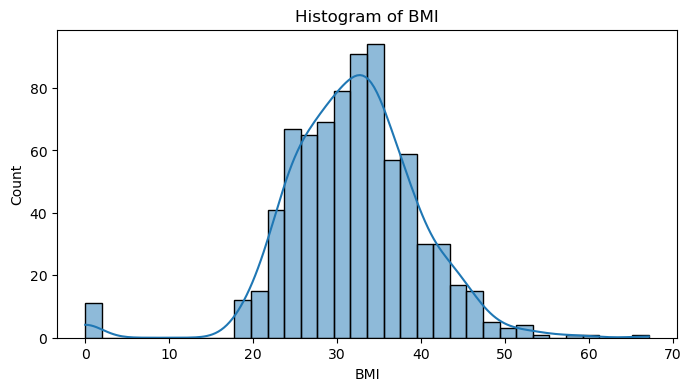

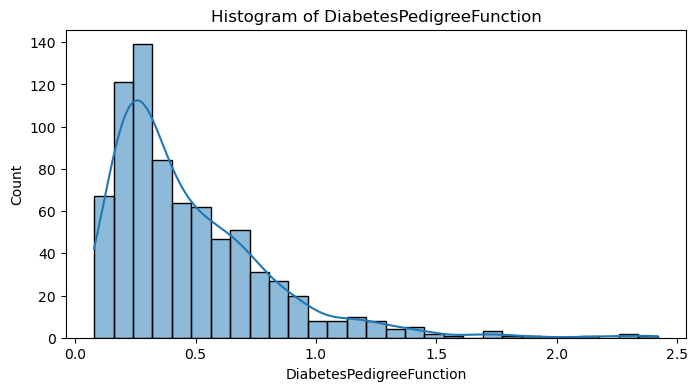

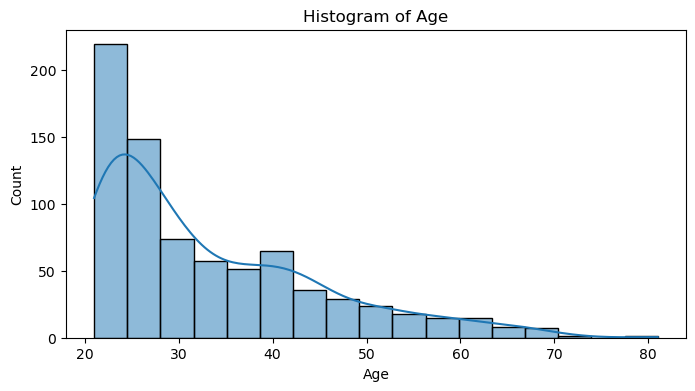

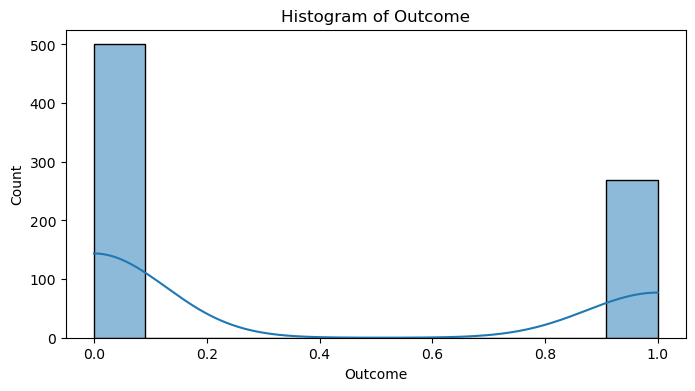

In [6]:
#EDA 
import matplotlib.pyplot as plt
import seaborn as sns       
for column in data.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [10]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

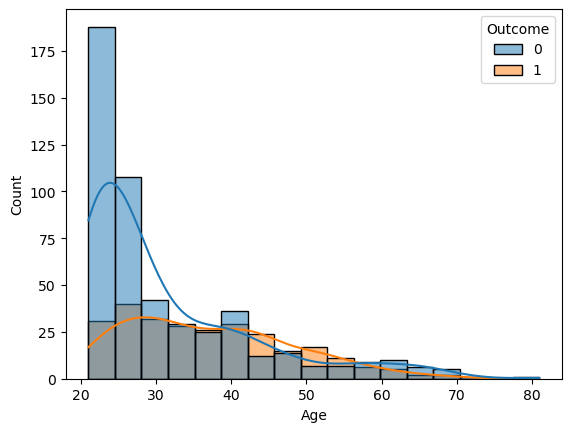

In [14]:
sns.histplot(data=data, x='Age', hue='Outcome', kde=True)

In [15]:
die_age = data.groupby('Outcome')['Age'].mean()
print(die_age) 


Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


In [17]:
#h0: both the groups have same average age   
#h1: both the groups have different average age   
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(data[data['Outcome'] == 0]['Age'], data[data['Outcome'] == 1]['Age'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis: The average ages are significantly different.")    
else:
    print("Fail to reject the null hypothesis: The average ages are not significantly different.")
    

T-statistic: -6.792688071649956, P-value: 2.2099754606654358e-11
Reject the null hypothesis: The average ages are significantly different.


In [21]:
for col in data.columns:
    if col != 'Outcome':
        die_values = data[col][data['Outcome'] == 1]
        nondie_values = data[col][data['Outcome'] == 0]
        stat, p = stats.ttest_ind(die_values.dropna(), nondie_values.dropna(), equal_var=False)
        alpha = 0.05
        if p < alpha:
            print(f'For {col}: Reject HO - Significant difference between groups')
        else:
            print(f'For {col}: Accept HO - No significant difference between groups')

For Pregnancies: Reject HO - Significant difference between groups
For Glucose: Reject HO - Significant difference between groups
For BloodPressure: Accept HO - No significant difference between groups
For SkinThickness: Reject HO - Significant difference between groups
For Insulin: Reject HO - Significant difference between groups
For BMI: Reject HO - Significant difference between groups
For DiabetesPedigreeFunction: Reject HO - Significant difference between groups
For Age: Reject HO - Significant difference between groups
